In [84]:
# Use Pedestrian column from police data to create new dataframe.
# Hope to show correlation between more pedestrians involved in road fatalities in lower income neighbourhoods

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [29]:
#Data sets
#toronto police data
toronto_data= pd.read_csv('Resources/Fatal_Collisions_toronto.csv')
#Toronto census data
toronto_income= pd.read_csv('Resources/income_toronto.csv')

In [30]:
#list columns- choose pedestrian related incidents
toronto_collision.columns
# toronto_income.columns

Index(['X', 'Y', 'Index_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'Hour', 'STREET1',
       'STREET2', 'OFFSET', 'ROAD_CLASS', 'District', 'WardNum', 'WardNum_X',
       'WardNum_Y', 'Division', 'Division_X', 'Division_Y', 'LATITUDE',
       'LONGITUDE', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT',
       'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY',
       'FATAL_NO', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND',
       'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND',
       'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'Hood_ID', 'Neighbourhood',
       'ObjectId'],
      dtype='object')

In [31]:
# Clean column layouts
toronto_income=toronto_income.rename(columns={'Population, 2016':'Population','Median Household Income Before Taxes':'Median Income'})

toronto_pedestrian=toronto_collision[['Neighbourhood','PEDESTRIAN']]
toronto_pedestrian=toronto_pedestrian.rename(columns={'PEDESTRIAN':'Pedestrian'
                                                    })


In [33]:
# Merge pedestrian dataframe with income
toronto_pedestrian=pd.merge(toronto_pedestrian,toronto_income)

,Neighbourhood,Pedestrian,Median Income,Population
0,Agincourt/Malvern,Yes,68108,96664
1,Agincourt/Malvern,Yes,68108,96664
2,Agincourt/Malvern,,68108,96664
3,Agincourt/Malvern,Yes,68108,96664
4,Agincourt/Malvern,Yes,68108,96664
...,...,...,...,...
605,St.Andrew-Windfields,,98420,17812
606,Parkwoods-Donalda,Yes,65126,10529
607,Henry Farm,,56644,15723
608,Henry Farm,,56644,15723


In [88]:
#Keep only rows involving pedestrians
toronto_pedestrian=(toronto_pedestrian[toronto_pedestrian["Pedestrian"] == 'Yes'])

#remove same outliers as last time
toronto_pedestrian=(toronto_pedestrian[toronto_pedestrian["Median Income"] <= 97000])
toronto_pedestrian

,Neighbourhood,Pedestrian,Median Income,Population
0,Agincourt/Malvern,Yes,68108,96664
1,Agincourt/Malvern,Yes,68108,96664
3,Agincourt/Malvern,Yes,68108,96664
4,Agincourt/Malvern,Yes,68108,96664
5,Agincourt/Malvern,Yes,68108,96664
...,...,...,...,...
601,Roncesvalles,Yes,63130,20923
602,Roncesvalles,Yes,63130,20923
603,Roncesvalles,Yes,63130,20923
606,Parkwoods-Donalda,Yes,65126,10529


In [89]:
#Group by neighbourhood
pedestrian_collisions=pd.DataFrame(toronto_pedestrian.groupby('Neighbourhood')['Pedestrian'].count())

pedestrian_income=pd.DataFrame(toronto_pedestrian.groupby('Neighbourhood')['Median Income'].min())

pedesitrian_hood=pd.merge(pedestrian_collisions,pedestrian_income, on='Neighbourhood')
pedesitrian_hood=pedesitrian_hood.rename(columns={'Pedestrian':'Collisions with Pedestrians'})
pedesitrian_hood=pedesitrian_hood.sort_values('Median Income',ascending=False)
pedesitrian_hood

,Collisions with Pedestrians,Median Income
Neighbourhood,,
Mount Pleasant East,2,93566
Casa Loma,2,93022
Banbury-Don Mills/York Mills,3,90620
Eringate-Centennial-West Deane,1,88872
Guildwood,1,87538
...,...,...
Flemingdon Park,2,48917
Bay Street Corridor,5,48737
Weston,1,45696


In [90]:
#Dependent varaible is collisions (y)
x_axis=pedesitrian_hood['Median Income']
y_axis=pedesitrian_hood['Collisions with Pedestrians']

The correlation coefficient is: -0.15058


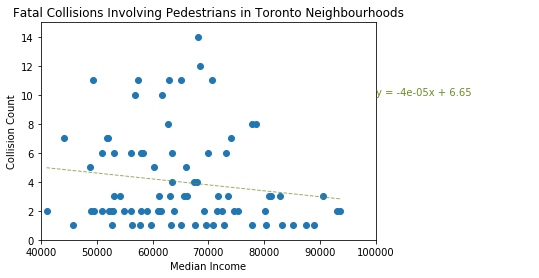

In [92]:
plt.scatter(x_axis,y_axis)
plt.title('Fatal Collisions Involving Pedestrians in Toronto Neighbourhoods')
plt.xlabel('Median Income')
plt.ylabel('Collision Count')
plt.xlim(40000,100000)
plt.ylim(0,15)

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_axis,y_axis)
rvalue=round(rvalue,5)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))

best_fit = slope * x_axis + intercept
plt.plot(x_axis,best_fit,linestyle='--', c='olivedrab', lw=1,alpha=.7)
print(f"The correlation coefficient is: {rvalue}")

plt.annotate(line_eq,(80000,10), fontsize=10,color='olivedrab')
plt.annotate(rvalue,(80000,8), fontsize=10,color='olivedrab')

plt.savefig('Output/ped_collisions_income.png')